In [ ]:
pip install scikit-learn==1.0.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 34.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


## **GETTING INFO OF DATASET**

In [ ]:
import pandas as pd

# Loading dataset
df = pd.read_csv("/content/finyrproj/heart-dis_dataset (1).csv")

# Get the non-null count and data types
column_info = pd.DataFrame({
    'S.No': range(1, len(df.columns) + 1),
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes
})

print(column_info)

               S.No         Column  Non-Null Count    Dtype
Age               1            Age            5132    int64
Gender            2         Gender            5131  float64
BMI               3            BMI            5132    int64
Chol              4           Chol            5132    int64
TG                5             TG            5132    int64
HDL               6            HDL            5132    int64
LDL               7            LDL            5132    int64
Cr                8             Cr            5132    int64
BUN               9            BUN            5132    int64
Heart_Disease    10  Heart_Disease            5132    int64
Heart_Risk       11     Heart_Risk            5132    int64


## **CHANGING THE TYPE OF VALUE FROM FLOAT TO INTEGER**

In [ ]:
import pandas as pd

# Loading dataset
df = pd.read_csv("/content/finyrproj/corrected_heart_disease_dataset.csv")

# Get the non-null count and data types
column_info = pd.DataFrame({
    'S.No': range(1, len(df.columns) + 1),
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Dtype': df.dtypes
})

print(column_info)

               S.No         Column  Non-Null Count    Dtype
Age               1            Age            6092    int64
Gender            2         Gender            6092    int64
BMI               3            BMI            6092    int64
Chol              4           Chol            6092    int64
TG                5             TG            6092    int64
HDL               6            HDL            6092    int64
LDL               7            LDL            6092    int64
Cr                8             Cr            6092  float64
BUN               9            BUN            6092    int64
Heart_Risk       10     Heart_Risk            6092    int64
Heart_Disease    11  Heart_Disease            6092    int64


## **Removing BUN and Cr**

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/finyrproj/corrected_heart_disease_dataset.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop the 'BUN' and 'Cr' columns
df = df.drop(columns=['BUN', 'Cr'])

# Save the modified dataset
df.to_csv("newconfirmed.csv", index=False)

# Download the modified dataset (optional, for Colab)
from google.colab import files
files.download("newconfirmed.csv")

print("✅ 'BUN' and 'Cr' columns removed. Updated dataset saved as 'updated_dataset.csv'.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 'BUN' and 'Cr' columns removed. Updated dataset saved as 'updated_dataset.csv'.


## **Load and Understand the Dataset**

In [1]:
import pandas as pd

# Loading dataset
df = pd.read_csv('/content/HN.csv')

# Display the first few rows
print(df.head())

# Checking missing values
print(df.info())

# Getting summary statistics for numeric columns
print(df.describe())


   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            6092 non-null   int64
 1   Gender         6092 non-null   int64
 2   BMI            6092 non-null   int64
 3   Chol           6092 non-null   int64
 4   TG             6092 non-null   int64
 5   HDL            6092 non-null   int64
 6   LDL            6092 non-null   int64
 7   Heart_Disease  6092 non-null   int64
dtypes: int64(8)
memory usage: 380.9 KB
None
               Age       Gender          BMI         Chol           TG  \
count  6092.000000 

### **Check for Missing Values**

In [2]:
# Checking missing values
print(df.isnull().sum())


Age              0
Gender           0
BMI              0
Chol             0
TG               0
HDL              0
LDL              0
Heart_Disease    0
dtype: int64


## **Analyze the Target Variable (Heart Disease)**

Heart_Disease
0    3046
1    3046
Name: count, dtype: int64


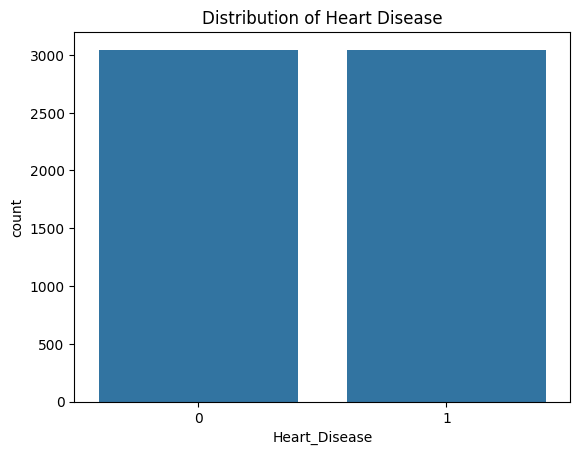

In [3]:
# Check class distribution of Heart_Disease (0: No, 1: Yes)
print(df['Heart_Disease'].value_counts())

# Plot of Heart_Disease
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()


## **Balancing the Data**

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Loading dataset
df = pd.read_csv("/content/HN.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Heart_Disease'] = y_resampled  # Add target column back

# Saving CSV
df_balanced.to_csv("HDF.csv", index=False)

print("Balanced dataset saved successfully! 🚀")


Balanced dataset saved successfully! 🚀


In [5]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Loading dataset
df = pd.read_csv("/content/HDF.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=['Heart_Disease'])  # All columns except the target
y = df['Heart_Disease']  # Target column


# **Balance class distribution**

In [6]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking new class distribution
print("Balanced Class Distribution:")
print(y_resampled.value_counts())


Balanced Class Distribution:
Heart_Disease
0    3046
1    3046
Name: count, dtype: int64


# **Distribution of Heart Disease**

Saving HDF.csv to HDF (1).csv
   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1
Class Distribution:
 Heart_Disease
0    3046
1    3046
Name: count, dtype: int64


<ipython-input-7-ccbc331100ed>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Disease', data=df, palette=['blue', 'red'])


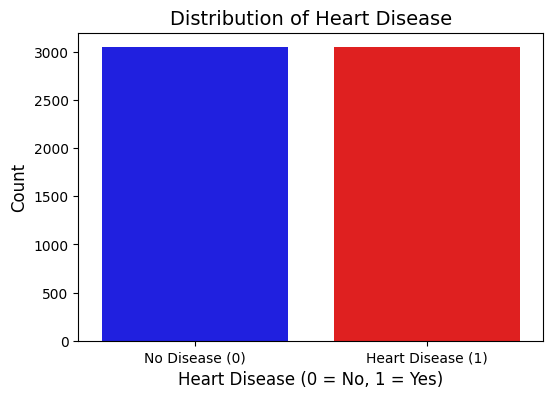


Percentage Distribution:
 Heart_Disease
0    50.0
1    50.0
Name: proportion, dtype: float64


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading Dataset
from google.colab import files
uploaded = files.upload()  # upload your CSV file

# Loading the dataset into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Checking the first few rows
print(df.head())

# Checking Class Distribution
class_counts = df['Heart_Disease'].value_counts()
print("Class Distribution:\n", class_counts)

# Visualizing Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', data=df, palette=['blue', 'red'])
plt.title('Distribution of Heart Disease', fontsize=14)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Disease (0)', 'Heart Disease (1)'])
plt.show()

# Percentage Distribution
class_percentage = df['Heart_Disease'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:\n", class_percentage)

## **Getting Best Model**

Original Class Distribution:
Heart_Disease
0    3046
1    3046
Name: count, dtype: int64


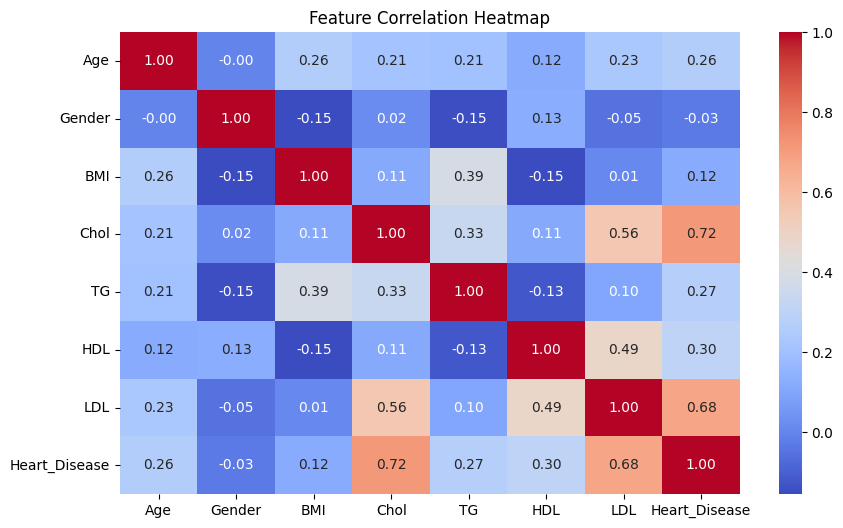

Balanced Class Distribution:
Heart_Disease
0    3046
1    3046
Name: count, dtype: int64

Model: Logistic Regression
Accuracy: 0.9491
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       610
           1       0.94      0.96      0.95       609

    accuracy                           0.95      1219
   macro avg       0.95      0.95      0.95      1219
weighted avg       0.95      0.95      0.95      1219


Model: Random Forest
Accuracy: 0.9984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.00      1.00       609

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219


Model: XGBoost
Accuracy: 0.9984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading Dataset
df = pd.read_csv('/content/HDF.csv')  # Change filename accordingly

# Checking Class Distribution
print("Original Class Distribution:")
print(df['Heart_Disease'].value_counts())


# Handle Missing Values
df.fillna(df.median(), inplace=True)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#Define Features & Target Variable
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

#Handle Imbalanced Data Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Balanced Class Distribution:")
print(pd.Series(y_resampled).value_counts())

#Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

#Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

#Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# Displaying Best Model
print("\n✅ Best Model:", best_model, "with Accuracy:", best_accuracy)


In [9]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Loading Dataset
df = pd.read_csv("/content/HDF.csv")  # Change to your dataset file


#Define Features & Target
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balance Data Using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#Feature Scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

best_model = None
best_accuracy = 0

print("\n🔹 Model Performance:\n")
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

# Hyperparameter Tuning for Best Model (XGBoost)
if isinstance(best_model, XGBClassifier):
    params = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    grid_search = GridSearchCV(best_model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_balanced, y_train_balanced)

    print("\n🔥 Best XGBoost Parameters:", grid_search.best_params_)
    best_model = grid_search.best_estimator_

#  Evaluate Best Model
y_pred_best = best_model.predict(X_test)
print("\n✅ Best Model Performance:\n")
print(classification_report(y_test, y_pred_best))
print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")



🔹 Model Performance:

Logistic Regression Accuracy: 0.9491
Random Forest Accuracy: 0.9984
SVM Accuracy: 0.9754
XGBoost Accuracy: 0.9984

✅ Best Model Performance:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.00      1.00       609

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

Best Model: RandomForestClassifier with Accuracy: 0.9984


# **GRAPHS**

## **LDL**

File loaded successfully!
   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1


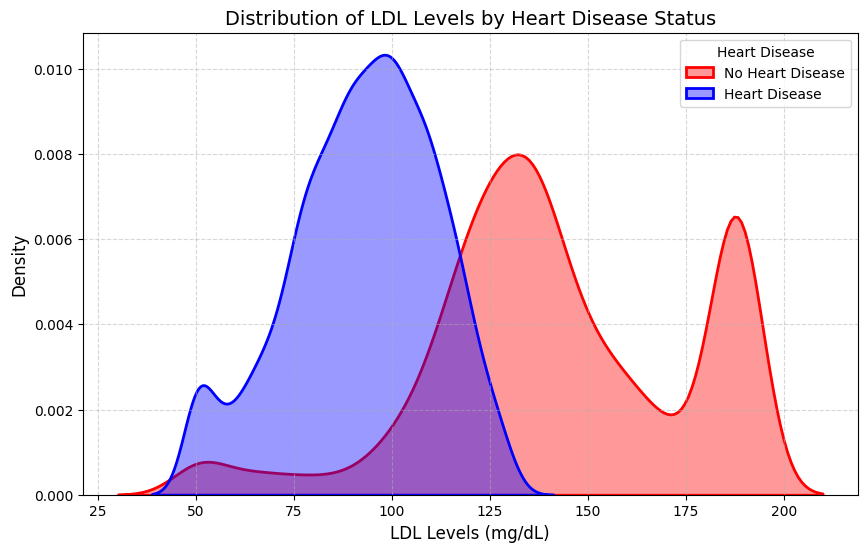

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path instead of uploading manually
file_path = "/content/HDF.csv"  # Replace with the correct file path

# Read the dataset
df = pd.read_csv(file_path)
print("File loaded successfully!")
print(df.head())

# Custom colors for Heart Disease vs No Heart Disease
custom_palette = {0: "blue", 1: "red"}  # Blue for No Heart Disease, Red for Heart Disease

# Plot KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='LDL', hue='Heart_Disease', fill=True, alpha=0.4, linewidth=2, palette=custom_palette)
plt.title('Distribution of LDL Levels by Heart Disease Status', fontsize=14)
plt.xlabel('LDL Levels (mg/dL)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **HDL**

File loaded successfully!
   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1


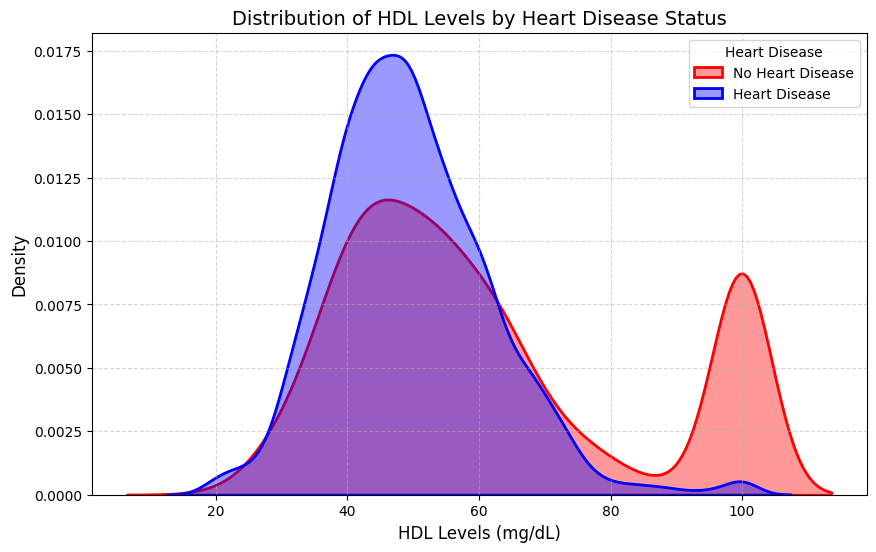

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path instead of manual upload
file_path = "/content/HDF.csv"  # Replace with your actual dataset path

# Read the dataset
df = pd.read_csv(file_path)
print("File loaded successfully!")
print(df.head())

# Custom colors for Heart Disease vs No Heart Disease
custom_palette = {0: "blue", 1: "red"}  # Blue for No Heart Disease, Red for Heart Disease

# Plotting KDE for HDL
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='HDL', hue='Heart_Disease', fill=True, alpha=0.4, linewidth=2, palette=custom_palette)
plt.title('Distribution of HDL Levels by Heart Disease Status', fontsize=14)
plt.xlabel('HDL Levels (mg/dL)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **CHOLESTEROL**

File loaded successfully!
   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1


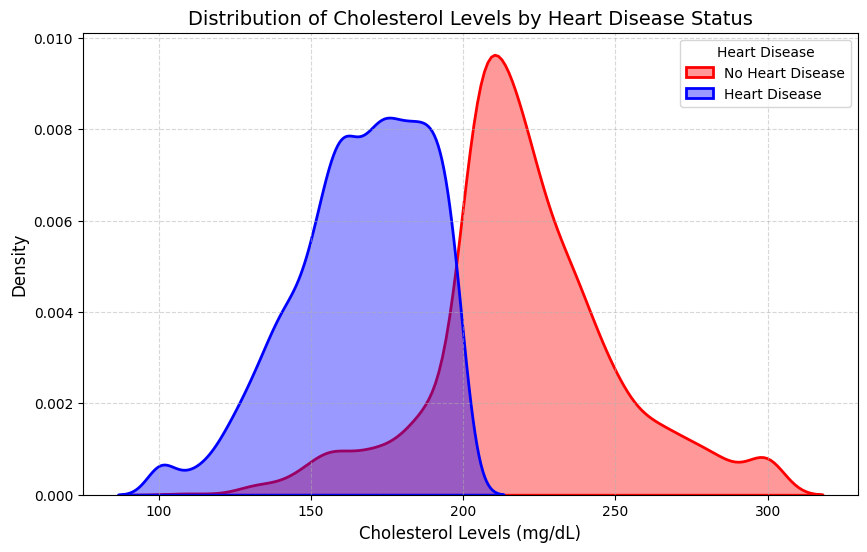

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path instead of manual upload
file_path = "/content/HDF.csv"  # Replace with your actual dataset path

# Read the dataset
df = pd.read_csv(file_path)
print("File loaded successfully!")
print(df.head())

# Custom colors for Heart Disease vs No Heart Disease
custom_palette = {0: "blue", 1: "red"}  # Blue for No Heart Disease, Red for Heart Disease

# Plotting KDE for Cholesterol
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Chol', hue='Heart_Disease', fill=True, alpha=0.4, linewidth=2, palette=custom_palette)
plt.title('Distribution of Cholesterol Levels by Heart Disease Status', fontsize=14)
plt.xlabel('Cholesterol Levels (mg/dL)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### **Best Model With Prediction**


In [13]:
# 🔹 Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# 🔹 Load dataset (Replace 'your_dataset.csv' with actual file path)
df = pd.read_csv('/content/HDF.csv')
print("✅ Dataset Loaded Successfully!")
print(df.head())

# 🔹 Preprocessing: Define Features & Target
X = df.drop(['Heart_Disease'], axis=1)  # Features
y = df['Heart_Disease']  # Target variable

# 🔹 Handle Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 🔹 Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🔹 Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# 🔹 Train & Evaluate Each Model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    results[name] = accuracy
    print(f"🔹 {name} Accuracy: {accuracy:.4f}")

# 🔹 Select the Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

# 🔹 Save the Best Model & Scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model & Scaler Saved Successfully!")

# 🔹 Load Model & Scaler for Prediction
loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# 🔹 Predict on New Data (Fixing Feature Mismatch)
new_data = np.array([[45, 1, 28, 220, 180, 50, 120]])  # Ensure only 7 features (matching training data)

# 🔹 Dynamically Check Feature Mismatch
expected_features = X_train.shape[1]  # Number of features used for training
actual_features = new_data.shape[1]

if actual_features != expected_features:
    raise ValueError(f"❌ ERROR: Expected {expected_features} features, but got {actual_features}. Check your input data!")

# 🔹 Scale and Predict
new_data_scaled = loaded_scaler.transform(new_data)  # Scale the new data
prediction = loaded_model.predict(new_data_scaled)  # Make Prediction

# 🔹 Display Prediction Result
print("\n🩺 Prediction: Heart Disease" if prediction[0] == 1 else "\n💙 Prediction: No Heart Disease")


✅ Dataset Loaded Successfully!
   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1
🔹 Logistic Regression Accuracy: 0.9467
🔹 Random Forest Accuracy: 0.9975
🔹 SVM Accuracy: 0.9729
🔹 XGBoost Accuracy: 0.9975

✅ Best Model: Random Forest with Accuracy: 0.9975
✅ Model & Scaler Saved Successfully!

🩺 Prediction: Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Separating Models**

In [14]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Loading Dataset
df = pd.read_csv('/content/HDF.csv')
print(df.head())

#  Preprocessing Data
X = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

# Handle Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    joblib.dump(model, f'{model_name.replace(" ", "_").lower()}_model.pkl')

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return accuracy


   Age  Gender  BMI  Chol   TG  HDL  LDL  Heart_Disease
0   50       1   24   162   80   93   54              0
1   53       1   25   147  134   39   84              0
2   34       0   29   138   92   48   85              0
3   39       0   26   159   92   45   89              0
4   29       1   22   184  104   36  131              1


# ** Logistic Regression**

Logistic Regression Accuracy: 0.9467


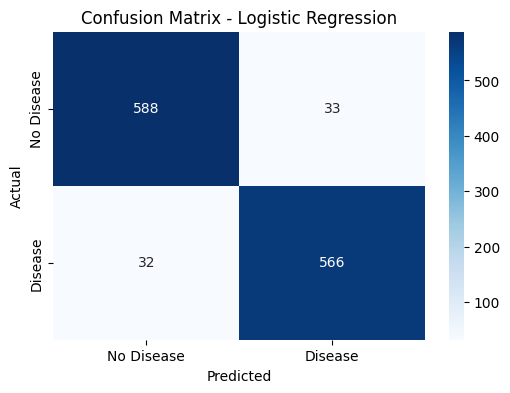

In [15]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_acc = train_and_evaluate_model(logistic_regression, "Logistic Regression")


## **Random Forest**

Random Forest Accuracy: 0.9975


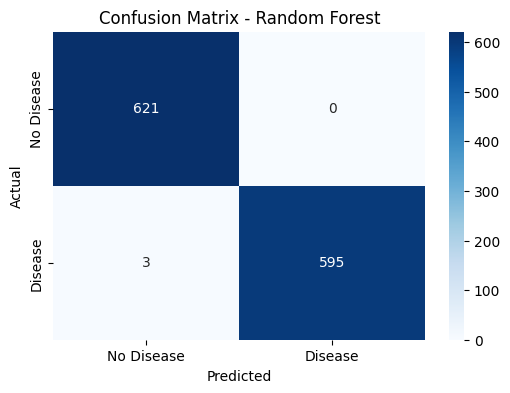

In [16]:
# Random Forest
random_forest = RandomForestClassifier()
rf_acc = train_and_evaluate_model(random_forest, "Random Forest")

## **SVM**

SVM Accuracy: 0.9729


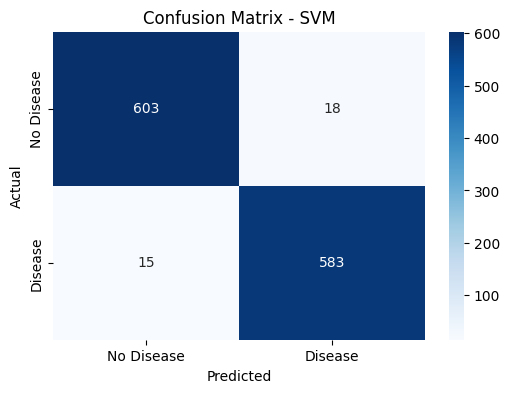

In [17]:
# SVM
svm_model = SVC()
svm_acc = train_and_evaluate_model(svm_model, "SVM")

## **XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9975


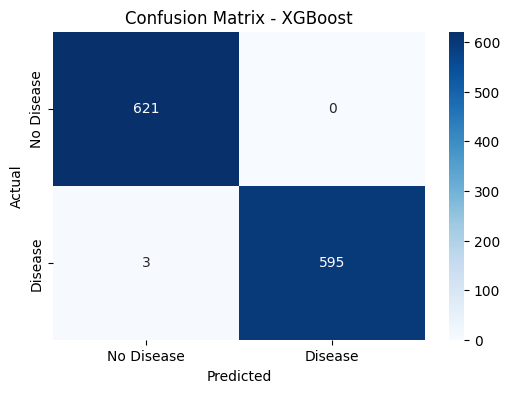

In [18]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_acc = train_and_evaluate_model(xgb_model, "XGBoost")

# ** Select the best model**

In [19]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# ✅ Load dataset
df = pd.read_csv('/content/HDF.csv')  # Adjust path if needed

# ✅ Check available columns
print("Columns in Dataset:", df.columns.tolist())

# ✅ Drop only existing columns (prevents KeyError)
columns_to_drop = ['BUN', 'Cr']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# ✅ Define features (X) and target variable (y)
X = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

# ✅ Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Scale features for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# ✅ Train models and evaluate accuracy
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# ✅ Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

# ✅ Save the best model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\n✅ Model & Scaler Saved Successfully!")

# ✅ Load model & scaler for prediction
loaded_model = joblib.load('best_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# ✅ Ensure correct feature count for new prediction
expected_features = X_train.shape[1]  # Number of features used for training

# ✅ Example new data (Ensure 7 features, not 8)
new_data = np.array([[45, 1, 28, 220, 180, 50, 120]])  # Corrected to match feature count

# ✅ Convert to DataFrame to retain feature names
new_data_df = pd.DataFrame(new_data, columns=X.columns)  # Ensure correct feature names

# ✅ Scale new data properly
new_data_scaled = loaded_scaler.transform(new_data_df)  # Scale new data
prediction = loaded_model.predict(new_data_scaled)  # Make prediction

# ✅ Display prediction result
print("\n🩺 Prediction: Heart Disease" if prediction[0] == 1 else "\n💙 Prediction: No Heart Disease")


Columns in Dataset: ['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Heart_Disease']
Logistic Regression Accuracy: 0.9467
Random Forest Accuracy: 0.9975
SVM Accuracy: 0.9729
XGBoost Accuracy: 0.9975

🏆 Best Model: Random Forest with Accuracy: 0.9975

✅ Model & Scaler Saved Successfully!

🩺 Prediction: Heart Disease


In [21]:
import joblib
import numpy as np

# Load the trained model and scaler with the correct file paths
rf_model = joblib.load('/content/random_forest_model.pkl')  # Update path
scaler = joblib.load('/content/scaler.pkl')  # Update path

# Check the number of features expected by the scaler
expected_features = scaler.n_features_in_
print(f"Scaler expects {expected_features} features.")

# Full new data with all 12 features
new_data = np.array([[
    45,  # Age
    1,    # Gender (1 for male, 0 for female)
    28,   # BMI
    1,    # Smoking (1 for yes, 0 for no)
    1,    # Family History of Kidney Disease (1 for yes, 0 for no)
    120,  # Systolic BP
    80,   # Diastolic BP
    1.2,  # Serum Creatinine
    18,   # BUN Levels
    80,   # GFR
    0,    # Protein in Urine (0 for no, 1 for yes)
    0     # Edema (0 for no, 1 for yes)
]])

# Select only the features used in training
# Adjust indices based on actual feature selection
selected_feature_indices = [0, 2, 5, 6, 7, 8, 9]  # Modify based on your model training features
new_data_selected = new_data[:, selected_feature_indices]

# Standardize the selected new data
new_data_scaled = scaler.transform(new_data_selected)

# Make prediction
rf_new_prediction = rf_model.predict(new_data_scaled)
rf_new_prediction_proba = rf_model.predict_proba(new_data_scaled)

# Print results
print("Random Forest Prediction for New Data:", rf_new_prediction)
print("Prediction Probability for New Data:", rf_new_prediction_proba)

# Extract probability of having kidney disease (Class 1)
kidney_disease_probability = rf_new_prediction_proba[0][1] * 100
print(f"Patient is affected by kidney disease with a probability of: {kidney_disease_probability:.2f}%")


Scaler expects 7 features.
Random Forest Prediction for New Data: [0]
Prediction Probability for New Data: [[0.98 0.02]]
Patient is affected by kidney disease with a probability of: 2.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Streamlit**

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load trained model and scaler
best_model = joblib.load(r"C:\Users\gamin\Documents\Finalyearproj\best_model (2).pkl")
scaler = joblib.load(r"C:\Users\gamin\Documents\Finalyearproj\scaler (1).pkl")

# Define correct feature names based on training data
feature_names = ['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL']

def predict_heart_disease(input_data):
    """Predict heart disease based on input data."""
    input_df = pd.DataFrame([input_data], columns=feature_names)
    input_scaled = scaler.transform(input_df)
    prediction = best_model.predict_proba(input_scaled)[0]
    return prediction

# Streamlit UI
st.set_page_config(page_title="Heart Disease Prediction", layout="centered", initial_sidebar_state="collapsed", page_icon="🩺")
st.markdown("""
    <style>
        body { background-color: #1E1E1E; color: white; font-family: 'Arial', sans-serif; }
        .stApp { background-color: #1E1E1E; }
        h1, h2, h3, h4, h5, h6 { color: #FFD700; }
        .stButton>button { background-color: #FF5722; color: white; border-radius: 8px; font-weight: bold; }
        .stTextInput>div>input, .stNumberInput>div>input { background-color: #333; color: white; border-radius: 5px; padding: 8px; }
        .highlight-box { padding: 15px; border-radius: 8px; font-weight: bold; font-size: 14px; margin-top: 10px; text-align: center; }
        .success { background-color: #4CAF50; border: 2px solid #2E7D32; color: white; }
        .warning { background-color: #FF9800; border: 2px solid #E65100; color: white; }
        .critical { background-color: #F44336; border: 2px solid #B71C1C; color: white; }
    </style>
""", unsafe_allow_html=True)

st.title("💖 Heart Disease Prediction App")
st.write("Enter patient details to predict heart disease risk.")

# Input fields
age = st.number_input("Enter Age", min_value=1, max_value=120, value=45)
sex = st.selectbox("Gender", ["Female", "Male"])
gender = 1 if sex == "Male" else 0
bmi = st.number_input("Enter BMI", min_value=10.0, max_value=50.0, value=25.0)
chol = st.number_input("Enter Cholesterol Level (Chol)", min_value=100, max_value=300, value=200)
tg = st.number_input("Enter Triglycerides (TG)", min_value=50, max_value=500, value=150)
hdl = st.number_input("Enter HDL Cholesterol", min_value=20, max_value=100, value=50)
ldl = st.number_input("Enter LDL Cholesterol", min_value=50, max_value=250, value=130)

# Predict button
if st.button("🔍 Predict Heart Disease"):
    try:
        input_data = [float(age), gender, float(bmi), float(chol), float(tg), float(hdl), float(ldl)]
        prediction = predict_heart_disease(input_data)
        high_risk = prediction[1] * 100
        low_risk = prediction[0] * 100
        
        # Display result
        risk_label = "High Risk" if high_risk > 50 else "Low Risk"
        color_class = "critical" if high_risk > 50 else "success"
        
        st.markdown(f"""<div class='highlight-box {color_class}'>
                    <h2 style='font-size:26px;'>{risk_label}</h2>
                    <p style='font-size:23px;'><strong>Confidence Score:</strong> {high_risk:.2f}%</p>
                    </div>""", unsafe_allow_html=True)
        
        if high_risk > 50:
            st.markdown("""<div class='highlight-box warning' style='font-size:22px;'>⚠️ Your heart health might be at risk. Please consult a doctor.</div>""", unsafe_allow_html=True)
            st.markdown("### Recommendations:")
            st.markdown("- 🏥 Consult a cardiologist immediately.")
            st.markdown("- 🥗 Adopt a heart-healthy diet with low cholesterol and saturated fats.")
            st.markdown("- 🏃 Engage in regular physical activity and maintain a healthy weight.")
            st.markdown("- 💓 Monitor your blood pressure and cholesterol levels regularly.")
        else:
            st.markdown("""<div class='highlight-box success' style='font-size:22px;'>✔️ Your heart health seems normal. Maintain a healthy lifestyle!</div>""", unsafe_allow_html=True)
            st.markdown("### Recommendations:")
            st.markdown("- 🍎 Continue maintaining a balanced diet rich in fruits and vegetables.")
            st.markdown("- 🏋️ Exercise regularly to keep your heart strong.")
            st.markdown("- 😌 Keep stress levels in check and maintain a healthy routine.")
        
        # Visualization
        fig, ax = plt.subplots(figsize=(5,4))
        ax.bar(["High Risk", "Low Risk"], [high_risk, low_risk], color=["#D32F2F", "#66BB6A"], edgecolor="black")
        ax.set_ylabel("Confidence (%)")
        ax.set_xlabel("Heart Disease Risk")
        ax.set_title("Risk Visualization (%)")
        ax.set_ylim(0, 100)
        for i, v in enumerate([high_risk, low_risk]):
            ax.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')
        
        st.pyplot(fig)
    except ValueError:
        st.error("❌ Please enter valid numerical values for all fields.")
